In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Text(0.5, 1.0, 'Process')

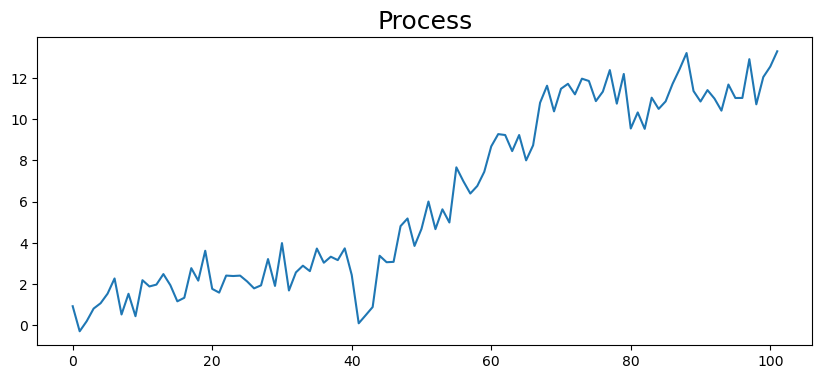

In [77]:
ar_trend = generate_ar_process(2, [.7,.3],100)
plt.figure(figsize=(10,4))
plt.plot(ar_trend)
plt.title('Process', fontsize=18)

In [78]:
perform_adf_test(ar_trend)

ADF Statistic: -0.662086
p-value: 0.856327


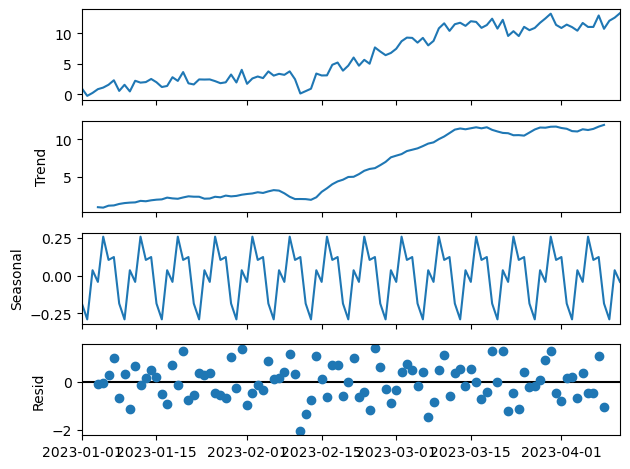

In [79]:
# Criar um índice de datas
data_inicio = '2023-01-01'  # Data inicial
datas = pd.date_range(start=data_inicio, periods=len(ar_trend), freq='D')

# Criar o DataFrame
df_trend = pd.DataFrame(data=ar_trend, index=datas, columns=['Valores'])

# Decompõe a timeseries
decomposicao = seasonal_decompose(df_trend,model='aditive')
decomposicao.plot()
plt.show()

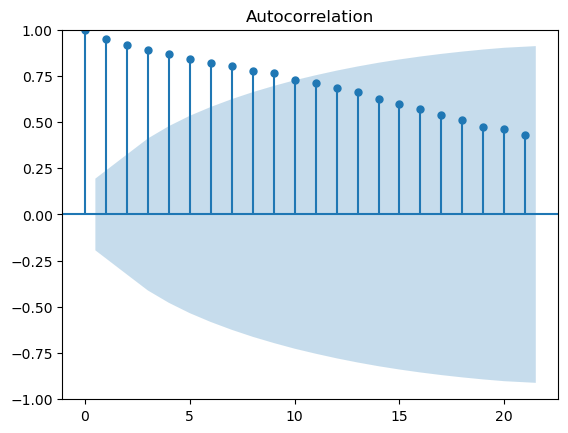

In [115]:
acf = plot_acf(ar_trend)

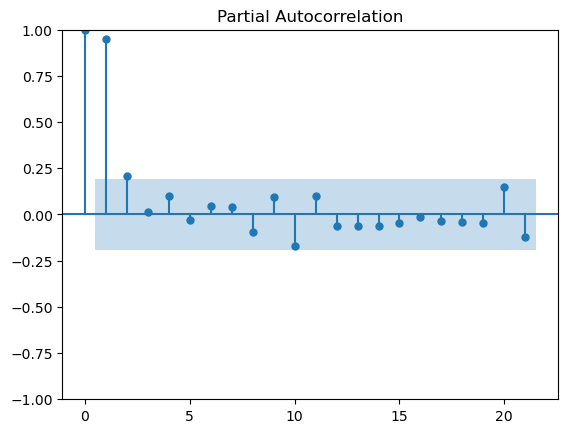

In [116]:
pacf = plot_pacf(ar_trend)

Assim, sabemos que ARIMA(p,1,q)

Para entender quais devem ser p e q, 

<Axes: >

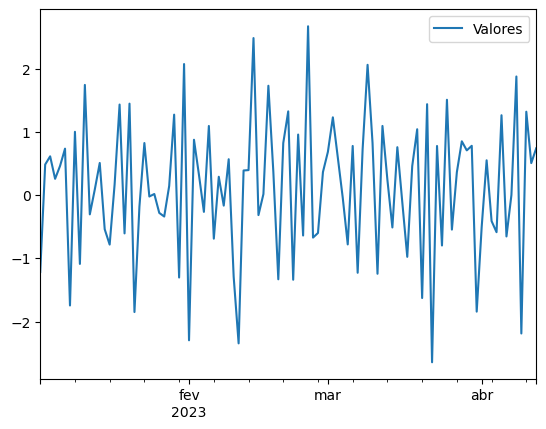

In [151]:
df_trend_diff =  df_trend.diff().dropna()
df_trend_diff.plot()

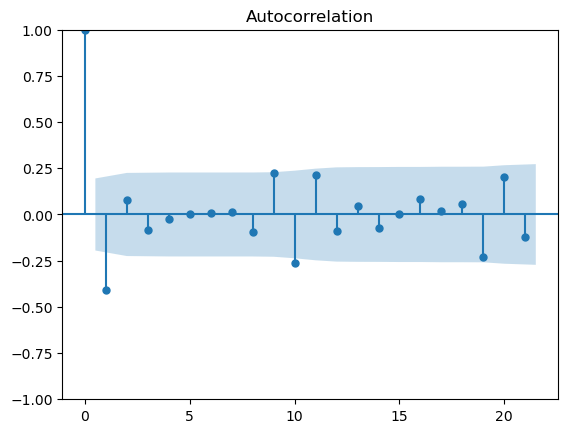

In [152]:
acf_diff = plot_acf(df_trend_diff)

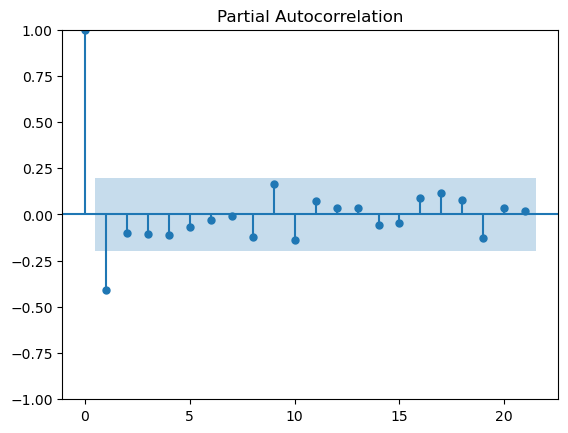

In [153]:
pacf_diff = plot_pacf(df_trend_diff)

Aqui podemos perceber que esta série, diferenciada, é um "White Noise". Sendo assim, não teremos o porquê de prever a Timeseries com ARIMA.
Podemos usar uma regressão linear por exemplo